En este proyecto se trabajará con una red de citas en linea, al estilo de "Tinder". Esta red se obtuvo del sitio "Network Repository" y tiene un total de 9,998 nodos y 542,598 aristas. Aqui cada nodo representa un usuario, y dos nodos estan conectados si hacen "match". Esta es una red bipartita y las aristas tienen peso, el cual indical un "rating" que va del 0 a 10.

In [25]:
#librerias requeridas para trabajar con grafos
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import powerlaw

ModuleNotFoundError: No module named 'powerlaw'

In [31]:
#se importa el archivo de la red
df  = pd.read_csv("C:/Users/52553/Downloads/Ejemplo1 (1).edges"," ")
#Se crea el grafo a partir del archivo de texto
G = nx.from_pandas_edgelist(df,source="n",target = "t")
df.head()

,n,t,w
0,1,1,8
1,2,2,6
2,2,3,10
3,2,4,7
4,2,5,10


In [16]:
#Se calcula la centralidad de grado de cada nodo
deg = nx.degree_centrality(G)
#Se crea un arreglo vacio para almacenar las centralidades
deg_list = np.zeros(G.number_of_nodes()+1)
#se llena el arreglo con los grados
for i in range(2,G.number_of_nodes()+1):
    deg_list[i]=deg[i]

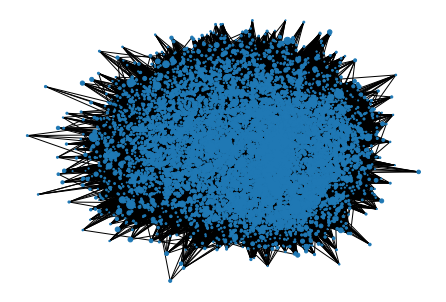

In [27]:
nx.draw(G,node_size=deg_list[2:len(G)+1]*500)


In [29]:
#Función para calcular la distribución de grado de un grafo
def deg_dist(g,normalized=True):
    deg_y = nx.degree_histogram(g)
    deg_x = np.arange(0,len(deg_y)).tolist()
    nodes = g.number_of_nodes()
    if normalized:
        for i in range(len(deg_y)):
            deg_y[i]=deg_y[i]/nodes
    return deg_x,deg_y

#Función para hacer plot de Pk
def plot_dist(deg_x,deg_y):
    plt.xlabel('k')
    plt.ylabel('Pk')
    plt.plot(deg_x, deg_y)
    
#Función para hacer plot de Pk en escala logarítmica
def plot_dist_log(deg_x,deg_y):
    plt.xlabel('k\n(log scale)')
    plt.ylabel('Pk\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(deg_x, deg_y)

La distribución de grado del grafo es:

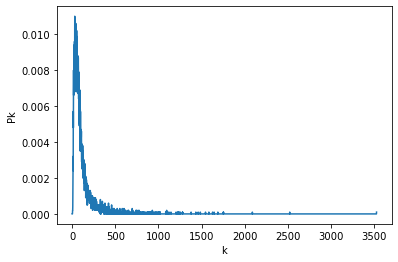

In [30]:
deg_x,deg_y = deg_dist(G)
plot_dist(deg_x,deg_y)

En escala logarítmica la distribución de grado es:

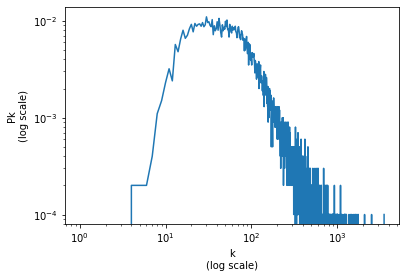

In [31]:
plot_dist_log(deg_x,deg_y)

Haciendole un ajuste con una Ley de potencia:

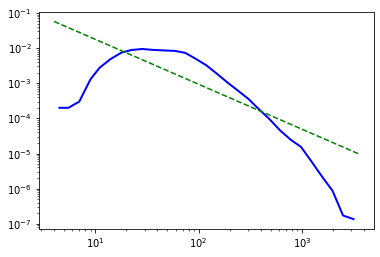

In [40]:
#Se obtiene la secuencia de grados por nodo
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#Se hace un fit de acuerdo con una ley de potencia
fit = powerlaw.Fit(degree_sequence,xmin=2)
#Se grafica el fit 
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig)

In [36]:
#matriz adyacencia
A= nx.to_pandas_adjacency(G)
#Transpuesta mátriz
AT=np.transpose(A)
#si es simetrica es no direccionada
tmp=1
if(np.all(A == AT)):
    print("No Direccionada")
    tmp=2
else: 
    print("Direccionada")
print("\nNodos totales: ",len(A))
print("\nConexiones: ",len(df))
#A^2 para los caminos de largo dos
A2=np.sum(np.dot(A,A))/tmp
#en la diagonal de la matriz está el numero de ciclos de 
#la longitud que se desea, como se quiere triangulos
#es necesario onbtener la traza de la matriz A^3
print("\nLos ciclos de 3 (triangulos) son:",np.trace(np.dot(A2,A)))


No Direccionada

Nodos totales:  9999

Conexiones:  544123

Los ciclos de 3 (triangulos) son: 7598272176.0
